# Dataset Summary Report 
Date: 2020/04/16

Two excel sheets were provided: 

1.   `TripValues`
2.   `User Groups`






#Deliverable 1a: 

## Summarize & give your interpretation of each data field for `TripValues` sheet. 

The fields in the `TripValues` sheet are:

1.   `ID`: indicates the record number
2.   `UserID`: indicates the unique identifier for the client 
3.   `DistanceTravelled`: indicates the amount of kilometres travelled per trip by client
4.   `OverallScore`: indicates the personalized metric the company has computed for the performance of that particular trip of the client
5.   `RegisteredOn`: indicates the date when the trip was taken place

Summary |`ID` | `UserID` | `DistanceTravelled` | `OverallScore` | `RegisteredOn`
:---:|:---:|:---:|:---:|:---: |:---:
DataType | int64 | int64 | float64 | float64 |datetime64 
PrimaryKey | No | Yes | No | No | Yes 
MinValue | 1 | 1 | 1 | .01 | NotApplicable*
MaxValue | 81911 | 14987 | 324 | 1 | NotApplicable**
UniqueValueCount | 81911 | 14925 | 324 | 100 | 294
NullCount | 0 | 0 | 30 | 0 | 0 



*earliest date: 2019/04/14

**latest date: 2020/02/1 


#Deliverable 1b: 
## Based on 1a, do you have any other observations and recommendations?

* There are 14925 unique users who have made 81911 trips in the span of about one year (from April 2019 to February 2020). 
1.   Out of 81911 trips there were 30 trips whose `DistanceTravelled` data couldn't be collected. (0.03% of total data). 
2.   These 30 trips belong to 10 unique users. However, these 10 users do have data collected in other instances therefore, that may mean that it is very likely the times when there wasn't any data collected by the data source may just have been a fluke. In other words, the data collection infrastructure is pretty solid for the last year, if it were to be improved, it wouldn't be worth the investment. 
* An average of 891Km was the distance travelled per user/client.
1.   The most popular day for driving was January 26, 2020 with 324 trips whereas the least popular day for driving was December 15, 2019 with 236 trips. Here are the top ten most popular days for driving and their `DistanceTravelled` counts with the bottom ten least popular days for driving and their `DistanceTravelled` counts:

![picture](https://drive.google.com/uc?id=1rCYVO4tVwWeTyHUz6I1Ad7Uj-HFFlcib)

![picture](https://drive.google.com/uc?id=1w2Ll4HSO-Cg6G_WGeAvCMkBMTzFpz728)


#Deliverable 1c

##Is there anything in the data that might help you to understand how the data was captured?

* It seems that the data in the `TripValues` sheet was recorded by a sensor/app on the vehicle of the client at the end of the trip. Since there is a `RegisteredOn` date field and a `DistanceTravelled` field, the only way it is possible to record those pieces of data is once the vehicle comes to a full stop after a particular trip.  

#Deliverable 2
## What are the set relationships for the fields in the `User Groups` sheet?

* The `User Groups` sheet contained four fields: `UserID_System1`,
`UserID_System2`,`UserID_System3`, and `UserID_System4` which represent the different sources that collect data for the same insured client.

* Upon inspection, `UserID_System2` is the complete one containing all unique user values of all the clients available, thus the other UserID_Systems (1,3,and 4) should be considered as extra available data sources for the clients in `UserID_System2`.

* The way the sheet is currently, corresponds to an appropriate mapping of the UserIDs across each system.

* It seems that each data source was implemented over time: meaning it first started with system2, then system1 was added, aftewards system3 was added, and finally system4 was tacked on.

* There are a total **15000** unique user IDs in `UserID_System2`:

1.   `UserID_System1` contains **99.5%** of the total user IDs in `UserID_System2`
2.   `UserID_System3` contains **96.2%** of the total user IDs in `UserID_System2`
3.   `UserID_System4` contains **17.8%** of the total user IDs in `User_IDSystem2`

* `UserID_System4` seems to be a new data source the company recently implemented to collect data on the clients since it contains the least amount of user IDs.

* Another way of thinking about this is:

1.  **17.8% of the clients of the company(or in this dataset) have data available from all 4 sources**

2.  **96.2% of the clients of the company(or in this dataset) have data available from 3 sources(System 1,2,3)**

3.  **99.5% of the clients of the company(or in this dataset) have data available from 2 sources(System 1, 2)**




# Deliverable 3

##Do longer trips have lower score?

* Since the average `OverallScore` of the entire dataset is about 0.51 and the 75th percentile of the `OverallScore` is .75, I defined "low score" to be < 0.5 and "high score" to be > 0.8. The 75th percentile of `DistanceTravelled` is 244km, therefore I defined "long distance" to be > 244km. The subset of this data yielded the following:

1. 25%(9807/40028) of low scores come from long distance trips
2. 25%(4116/16333) of high scores come from long distance trips as well

* Conclusion: longer trips have no influence on low scores

* Below is a graph of the average `DistanceTravelled` vs average `OverallScore` of the whole data set. We can see the scores are pretty even across all distances travelled:

![picture](https://drive.google.com/uc?id=1sl56KgkMGtG-m9VC0HWFtNJklVAhAqya)
##Do drivers with longer trips have lower scores?

Looking at the scores of the unique drivers in the subsection of `DistanceTravelled` > 244 km:

1. 22% (2414/11095) of long trip drivers have both low scores and high scores
2. 43% (4738/11095) of long trip drivers have low scores and no high scores
3. 3% (401/11095) of long trip drivers have high scores and no low scores
4. combinations with medium scores between 0.5 and 0.8 for long trip drivers were ignored.

* Conclusion: Yes. Drivers with longer trips tend to have lower scores.

Below are two graphs, one is the amount of long distance trips with "high score" and the amount long distance trips with "low score": 
![picture](https://drive.google.com/uc?id=1rKscwMQPKBmxWuUq3sLYoR0BWGu4610X)
![picture](https://drive.google.com/uc?id=1SdiR5jW_EIXjE2jk88xmi98LYe05739f)

## Is the quality of drivers improving over time?

Given the graph below of the average `OverallScore` over time, it looks like the quality of drivers has stayed steady. 

![picture](https://drive.google.com/uc?id=1Bde5xEIsUQFSB7n7Aq-g7sTVU3vCBmcG)

## Are there insights on trip duration for our user base?

There are 81911 total trips, however all of those trips fall into 324 distances. The users in this data set tend to drive long distances because there were 216 trips at 232 km(the smallest count) and 292 trips at 292 km (the largest count).

Here's a graph of daily average trip duration:
![picture](https://drive.google.com/uc?id=1eazaODuJaCCD1Ds7_A2RX8yWuNKvDL5_)

#Code used to answer deliverable 1a

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing libraries that will be used
import pandas as pd
#import pandas_profiling as pp (learn why it didn't work) 
import matplotlib.pyplot as plt

In [0]:
#reading in the two excel sheets of data
df1=pd.read_excel("/content/drive/My Drive/Colab Notebooks/Onlia_Assignment/Analyst Technical Test v1.0.xlsx", sheet_name="TripValues")
df2=pd.read_excel("/content/drive/My Drive/Colab Notebooks/Onlia_Assignment/Analyst Technical Test v1.0.xlsx", sheet_name="User Groups")

In [0]:
#reading in the two excel sheets of data
df1=pd.read_excel("Analyst Technical Test v1.0.xlsx",sheet_name="TripValues")
df2=pd.read_excel("Analyst Technical Test v1.0.xlsx",sheet_name="User Groups")

In [3]:
#check data types
df1.dtypes

ID                            int64
UserID                        int64
DistanceTravelled           float64
OverallScore                float64
RegisteredOn         datetime64[ns]
dtype: object

In [4]:
#get some of the information needed
df1.describe()

,ID,UserID,DistanceTravelled,OverallScore
count,81911.000000,81911.000000,81881.000000,81911.000000
mean,40956.000000,7512.695694,162.406150,0.505622
std,23645.813287,4326.868534,93.600229,0.288073
min,1.000000,1.000000,1.000000,0.010000
25%,20478.500000,3748.000000,81.000000,0.260000
50%,40956.000000,7554.000000,162.000000,0.510000
75%,61433.500000,11260.000000,244.000000,0.750000
max,81911.000000,14987.000000,324.000000,1.000000


In [0]:
#checking for null values
df1.isnull().sum()

ID                    0
UserID                0
DistanceTravelled    30
OverallScore          0
RegisteredOn          0
dtype: int64

In [0]:
#size of dataframe
df1.shape

(81911, 5)

In [0]:
#checking for unique values for ID
df1.ID.nunique()

81911

In [0]:
#checking for unique values for USERID
df1.UserID.nunique()

14925

In [0]:
#checking for unique values for DistanceTravelled
df1.DistanceTravelled.nunique()

324

In [0]:
#checking for unique values for OverallScore
df1.OverallScore.nunique()

100

In [0]:
#checking for unique values for RegisteredOn
df1.RegisteredOn.nunique()

294

In [0]:
df1.columns

Index(['ID', 'UserID', 'DistanceTravelled', 'OverallScore', 'RegisteredOn'], dtype='object')

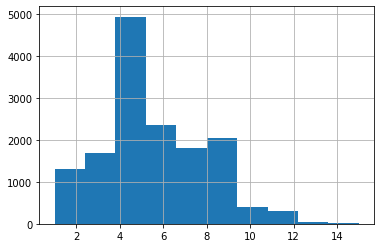

In [71]:
df1.UserID.value_counts().hist()

In [0]:
# plot data (understand what happened here eventually)
#fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
#df1.groupby(['DistanceTravelled','OverallScore']).mean()['UserID'].unstack().plot(ax=ax)

In [0]:
#fig, ax = plt.subplots(figsize=(15,7))
#df1.groupby(['UserID'])['DistanceTravelled','OverallScore'].mean().unstack().plot()


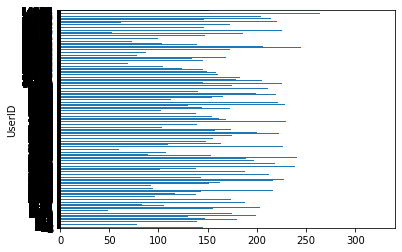

In [72]:
df1.groupby(['UserID'])['DistanceTravelled'].mean().plot.barh()

In [0]:
#create three new columns with low_score, med_score, high_score
df1_sorted_by_date['low_score'] = df1_sorted_by_date['OverallScore'].apply(lambda x: x < 0.5)
df1_sorted_by_date['med_score'] = df1_sorted_by_date['OverallScore'].apply(lambda x: 0.5< x < 0.8)
df1_sorted_by_date['high_score'] = df1_sorted_by_date['OverallScore'].apply(lambda x: x > 0.8)

In [0]:
df_low_score=df1_sorted_by_date[df1_sorted_by_date['low_score'] == True]
df_med_score=df1_sorted_by_date[df1_sorted_by_date['med_score'] == True]
df_high_score=df1_sorted_by_date[df1_sorted_by_date['high_score'] == True]

In [0]:
df2.isna().sum()

UserID_System1       75
UserID_System2        0
UserID_System3      578
UserID_System4    12336
dtype: int64

In [0]:
df1.head()

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn
0,44757,1,216.0,0.44,2019-04-14
1,77410,1,55.0,0.51,2019-05-09
2,20085,1,165.0,0.54,2019-05-12
3,62329,1,224.0,0.22,2019-05-22
4,80579,1,11.0,0.74,2019-08-31


In [0]:
df1.tail()

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn
81906,80687,14987,100.0,0.72,2019-07-17
81907,15416,14987,272.0,0.25,2019-08-12
81908,16670,14987,241.0,0.82,2019-09-20
81909,54432,14987,113.0,0.64,2019-11-18
81910,13062,14987,98.0,0.84,2019-11-23


In [0]:
df1.UserID.nunique()

14925

In [5]:
df1_sorted_by_ID=df1
df1_sorted_by_ID=df1_sorted_by_ID.sort_values(by='ID')
df1_sorted_by_ID

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn
29822,1,5492,83.0,0.75,2019-12-01
30278,2,5579,55.0,0.83,2019-12-25
69932,3,12813,319.0,0.28,2019-04-25
47089,4,8653,137.0,0.50,2019-10-14
22836,5,4197,307.0,0.91,2019-10-16
...,...,...,...,...,...
36634,81907,6750,172.0,0.97,2020-01-12
73936,81908,13530,296.0,0.46,2019-11-30
26001,81909,4787,201.0,0.55,2020-01-11
44687,81910,8217,90.0,0.68,2019-04-22


In [0]:
df1_sorted_by_date=df1
df1_sorted_by_date['RegisteredOn']=pd.to_datetime(df1['RegisteredOn'])
df1_sorted_by_date=df1_sorted_by_date.sort_values(by="RegisteredOn")

In [28]:
#seeing if there's any pattern with the NaN values in Distance Travelled
is_NaN = df1_sorted_by_date.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df1_sorted_by_date[row_has_NaN]
print(rows_with_NaN)

          ID  UserID  DistanceTravelled  OverallScore RegisteredOn
63135  24076   11567                NaN          0.30   2019-05-16
18915  46434    3465                NaN          0.50   2019-06-23
18916  65796    3465                NaN          0.10   2019-06-30
7681   15138    1425                NaN          0.08   2019-07-02
18920   7099    3466                NaN          0.69   2019-07-16
18924  19177    3467                NaN          0.41   2019-07-28
18917  37547    3465                NaN          0.09   2019-08-03
63136  36711   11567                NaN          0.48   2019-08-04
33421  44385    6154                NaN          0.12   2019-08-09
18918  71721    3465                NaN          0.78   2019-08-16
10813  23005    1979                NaN          0.12   2019-08-17
33424  11498    6155                NaN          0.40   2019-08-28
33422   6483    6154                NaN          0.14   2019-09-11
63137  14782   11567                NaN          0.61   2019-0

In [29]:
rows_with_NaN.UserID.nunique()

10

In [56]:
pd.Series(rows_with_NaN.UserID.isin(df1.UserID).values.astype(int), rows_with_NaN.UserID.values).sum()

30

###Below is the code used to answer Deliverable 2

In [0]:
df2.head()

,UserID_System1,UserID_System2,UserID_System3,UserID_System4
0,7946.0,1,1.0,18245.0
1,12920.0,2,2.0,18246.0
2,5503.0,3,3.0,18247.0
3,14082.0,4,4.0,18248.0
4,14621.0,5,14.0,18249.0


In [0]:
df2.tail()

,UserID_System1,UserID_System2,UserID_System3,UserID_System4
14995,NaN,14996,NaN,NaN
14996,NaN,14997,NaN,NaN
14997,NaN,14998,NaN,NaN
14998,NaN,14999,NaN,NaN
14999,NaN,15000,NaN,NaN


In [0]:
df2.shape

(15000, 4)

In [6]:
#listing the fields of 'User Groups' sheet
df2.columns

Index(['UserID_System1', 'UserID_System2', 'UserID_System3', 'UserID_System4'], dtype='object')

In [7]:
#checking size of dataframe
df2.shape

(15000, 4)

In [16]:
df2.head()

,UserID_System1,UserID_System2,UserID_System3,UserID_System4
0,7946.0,1,1.0,18245.0
1,12920.0,2,2.0,18246.0
2,5503.0,3,3.0,18247.0
3,14082.0,4,4.0,18248.0
4,14621.0,5,14.0,18249.0


In [17]:
df2.tail()

,UserID_System1,UserID_System2,UserID_System3,UserID_System4
14995,NaN,14996,NaN,NaN
14996,NaN,14997,NaN,NaN
14997,NaN,14998,NaN,NaN
14998,NaN,14999,NaN,NaN
14999,NaN,15000,NaN,NaN


In [12]:
#since the size of the dataframe is 15000 and the number of unique users in system 2 is also 15000 
#that means UserID_System2 is the source containing the complete list of clients 
print(df2.UserID_System1.nunique())
print(df2.UserID_System2.nunique())
print(df2.UserID_System3.nunique())
print(df2.UserID_System4.nunique())

14925
15000
14422
2664


In [13]:
#checking for null values
df2.isnull().sum()

UserID_System1       75
UserID_System2        0
UserID_System3      578
UserID_System4    12336
dtype: int64

In [15]:
#adding the unique userIDs (from system1,3,and 4) plus the number of total nulls in each system yields 15000
#therefore this means that we can base UserID_Systems 1,3, and 4 on UserID_System2 
print(df2.UserID_System1.nunique()+df2.UserID_System1.isnull().sum())
print(df2.UserID_System3.nunique()+df2.UserID_System3.isnull().sum())
print(df2.UserID_System4.nunique()+df2.UserID_System4.isnull().sum())

15000
15000
15000


In [21]:
#checking to see which users have all four sources of data
df2[df2['UserID_System1'].notnull() & df2['UserID_System2'].notnull() & df2['UserID_System3'].notnull() & df2['UserID_System4'].notnull()].shape[0]

2664

In [23]:
#checking to see which users have 3 sources of data
df2[df2['UserID_System1'].notnull() & df2['UserID_System2'].notnull() & df2['UserID_System3'].notnull()].shape[0]

14422

In [24]:
#checking to see which users have 2 sources of data(1 & 2)
df2[df2['UserID_System1'].notnull() & df2['UserID_System2'].notnull()].shape[0]

14925

In [25]:
#checking to see which users have 2 sources of data(1 & 3). 
#This equals to 3 sources, thus confirming that each system had been added on over time and the UserIDs in the sheet correspond
#to the correct mapping 
df2[df2['UserID_System1'].notnull() & df2['UserID_System3'].notnull()].shape[0]

14422

#Below is the code for deliverable 3

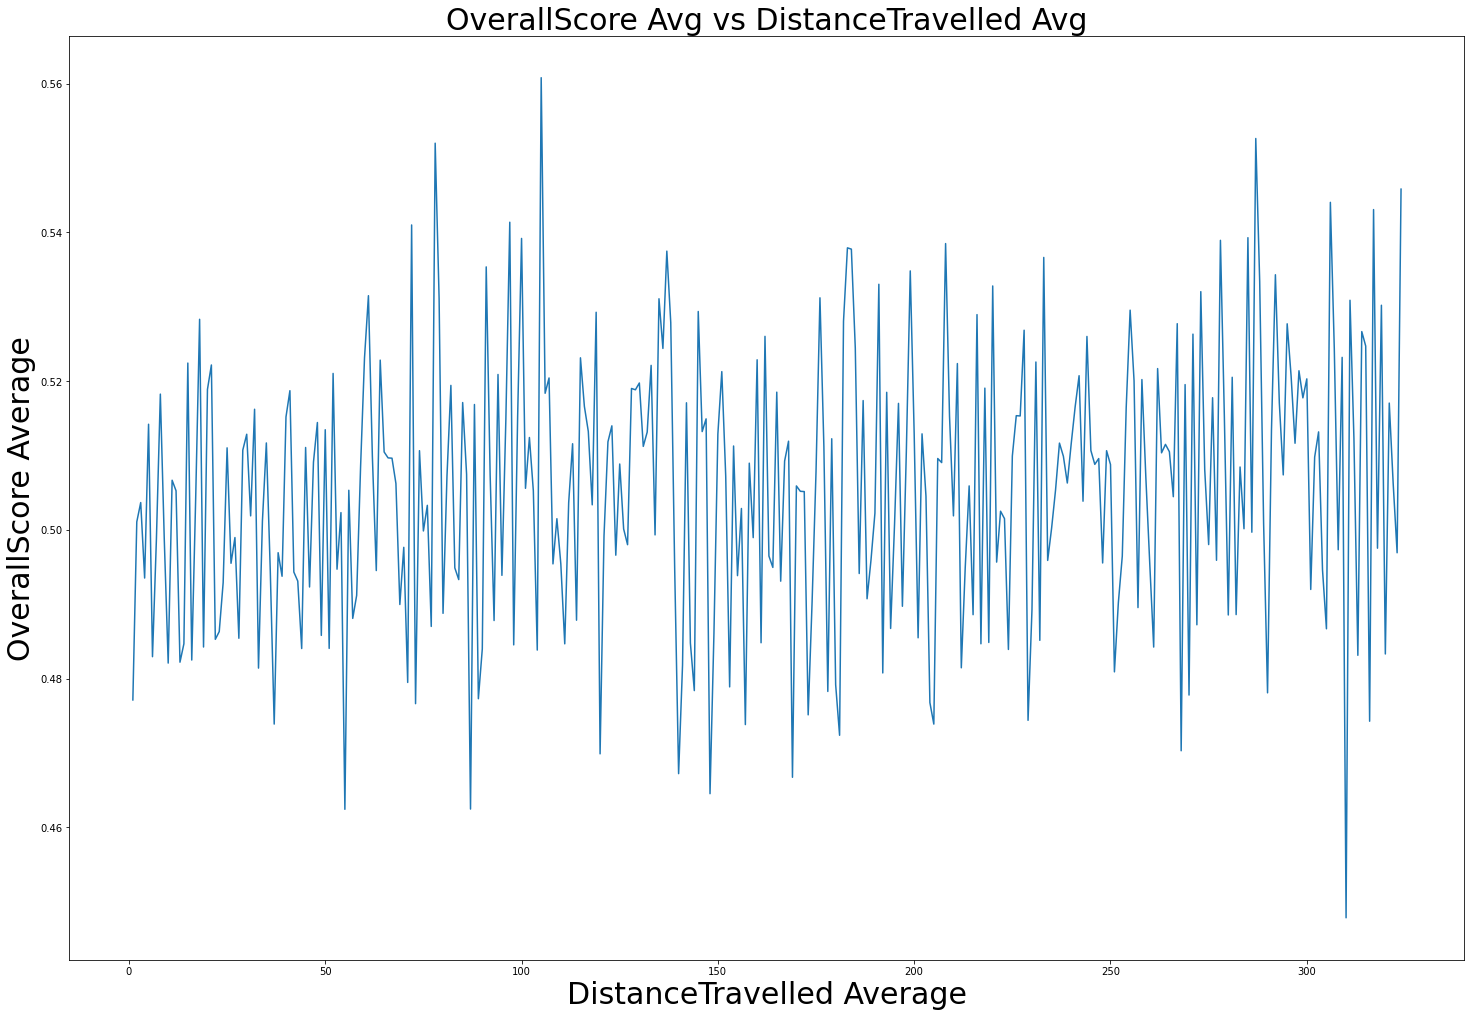

In [106]:
# plotting overall score average vs distance travelled average
fig, ax = plt.subplots(figsize=(25,17))
df1.groupby(['DistanceTravelled']).mean()['OverallScore'].plot(ax=ax)
plt.ylabel('OverallScore Average', fontsize=30)
plt.xlabel('DistanceTravelled Average', fontsize=30)
plt.title('OverallScore Avg vs DistanceTravelled Avg', fontsize=30)
plt.show()

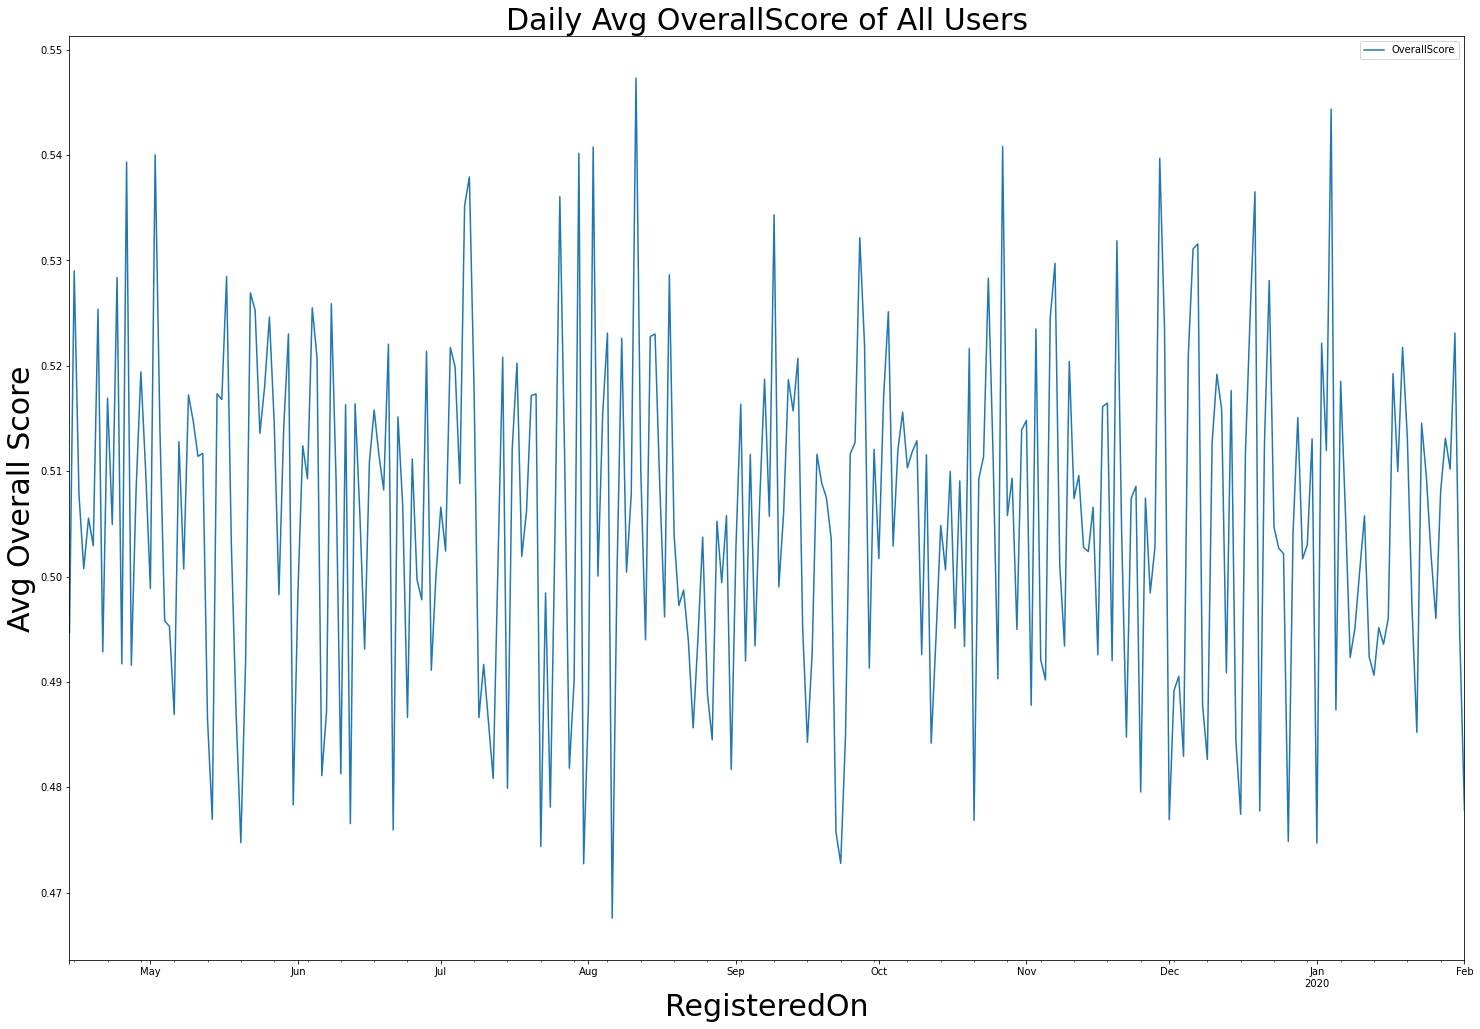

In [107]:
#plotting average OverallScore vs Day
df_s_=df1_sorted_by_date[['RegisteredOn','OverallScore']]
df_s_.index = df_s_['RegisteredOn']
del df_s_['RegisteredOn']
df_s_.groupby(level=0).mean().plot(figsize=(25,17))
plt.ylabel('Avg Overall Score', fontsize=30)
plt.xlabel('RegisteredOn', fontsize=30)
plt.title('Daily Avg OverallScore of All Users', fontsize=30)
plt.show()

In [93]:
#define lowscore to be < 0.5
df1_sorted_by_date['low_score'] = df1_sorted_by_date['OverallScore'].apply(lambda x: x < 0.5)
#see how many trips are low score
df1_sorted_by_date[df1_sorted_by_date['low_score'] == True].shape

(40028, 7)

In [108]:
df1_sorted_by_date.head()

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn,high_score,low_score
0,44757,1,216.0,0.44,2019-04-14,False,True
63415,66981,11617,251.0,0.71,2019-04-14,False,False
12020,72939,2199,154.0,0.02,2019-04-14,False,True
47975,12947,8810,178.0,0.27,2019-04-14,False,True
80491,71205,14735,40.0,0.68,2019-04-14,False,False


In [0]:
df_low_score=df1_sorted_by_date[df1_sorted_by_date['low_score'] == True]

In [110]:
df_low_score.head()

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn,high_score,low_score
0,44757,1,216.0,0.44,2019-04-14,False,True
12020,72939,2199,154.0,0.02,2019-04-14,False,True
47975,12947,8810,178.0,0.27,2019-04-14,False,True
73318,29866,13420,129.0,0.45,2019-04-14,False,True
48278,79594,8862,129.0,0.45,2019-04-14,False,True


In [111]:
#checking if longer trips give low score
long_dist_low_score=df_low_score[df_low_score['DistanceTravelled']>244]
long_dist_low_score.shape

(9807, 7)

In [112]:
#define high score to be >0.8 and see how many trips are high score
df1_sorted_by_date['high_score'] = df1_sorted_by_date['OverallScore'].apply(lambda x: x > 0.8)
df_high_score=df1_sorted_by_date[df1_sorted_by_date['high_score'] == True]
df_high_score.shape


(16333, 7)

In [113]:
#checking if long distances give high score
long_dist_high_score=df_high_score[df_high_score['DistanceTravelled']>244]
long_dist_high_score.shape

(4116, 7)

In [114]:
df_long_distance.UserID.nunique()

11095

In [115]:
long_dist_low_score=df_low_score[df_low_score['DistanceTravelled']>244]
long_dist_low_score.shape

(9807, 7)

In [116]:
df_long_distance.head()

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn,high_score
63415,66981,11617,251.0,0.71,2019-04-14,False
13999,62996,2568,287.0,0.73,2019-04-14,False
62577,27125,11470,279.0,0.73,2019-04-14,False
62353,36171,11433,266.0,0.78,2019-04-14,False
73173,13629,13394,295.0,0.19,2019-04-14,False


In [0]:
df_long_distance[df_long_distance.low_score==True].UserID.nunique()

In [101]:
df_long_distance[df_long_distance.high_score==True].UserID.nunique()

3589

In [0]:
long_distance_with_low_score=df_long_distance[df_long_distance.low_score==True]
long_distance_with_high_score=df_long_distance[df_long_distance.high_score==True]

In [62]:
#checking how many Users drive long distance with low scores are also high scores
pd.Series(long_distance_with_low_score.UserID.isin(long_distance_with_high_score.UserID).values.astype(int), long_distance_with_low_score.UserID.values).sum()

2414

In [64]:
#checking how many Users drive long distance with high scores are also low scores
pd.Series(long_distance_with_high_score.UserID.isin(long_distance_with_low_score.UserID).values.astype(int), long_distance_with_high_score.UserID.values).sum()

2013

In [0]:
df_low_score=df1_sorted_by_date[df1_sorted_by_date['low_score'] == True]
df_low_score['DistanceTravelled'].value_counts().sort_values().head(10).plot(kind='barh', figsize=(25,17), color='red')
plt.xlabel("Counts", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Distance Travelled", fontsize=30)
plt.title("Bottom 10 DistanceTravelled Counts with OverallScore<0.5", fontsize=30)
plt.show()

In [0]:
df_low_score=df1_sorted_by_date[df1_sorted_by_date['low_score'] == True]
df_low_score['DistanceTravelled'].value_counts().sort_values().tail(10).plot(kind='barh', figsize=(25,17))
plt.xlabel("Counts", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Distance Travelled", fontsize=30)
plt.title("Top 10 DistanceTravelled Counts with OverallScore<0.5", fontsize=30)
plt.show()

In [67]:
df1_sorted_by_date=df1
df1_sorted_by_date['RegisteredOn']=pd.to_datetime(df1['RegisteredOn'])
df1_sorted_by_date=df1_sorted_by_date.sort_values(by="RegisteredOn")
df_d_=df1_sorted_by_date[['RegisteredOn','DistanceTravelled']]
df_d_

,RegisteredOn,DistanceTravelled
0,2019-04-14,216.0
63415,2019-04-14,251.0
12020,2019-04-14,154.0
47975,2019-04-14,178.0
80491,2019-04-14,40.0
...,...,...
66911,2020-02-01,134.0
34145,2020-02-01,289.0
61917,2020-02-01,296.0
3410,2020-02-01,145.0


In [68]:
df_d_.index = df_d_['RegisteredOn']
del df_d_['RegisteredOn']
df_d_

,DistanceTravelled
RegisteredOn,
2019-04-14,216.0
2019-04-14,251.0
2019-04-14,154.0
2019-04-14,178.0
2019-04-14,40.0
...,...
2020-02-01,134.0
2020-02-01,289.0
2020-02-01,296.0


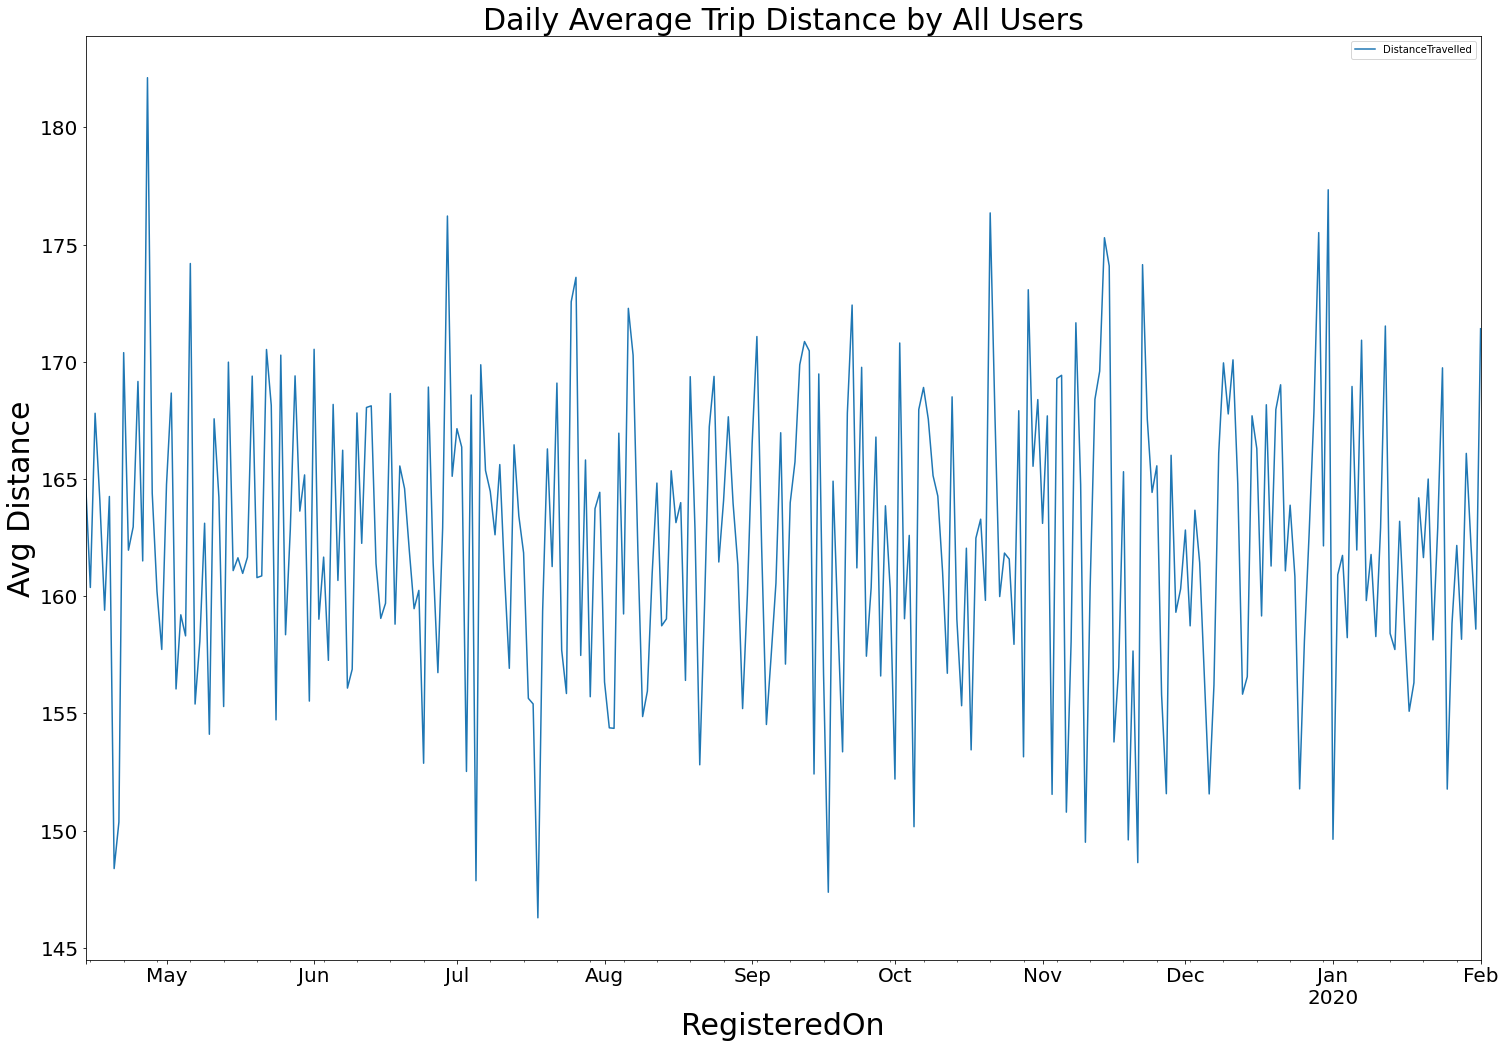

In [69]:
df_d_.groupby(level=0).mean().plot(figsize=(25,17))
plt.ylabel('Avg Distance', fontsize=30)
plt.xlabel('RegisteredOn', fontsize=30)
plt.title('Daily Average Trip Distance by All Users',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

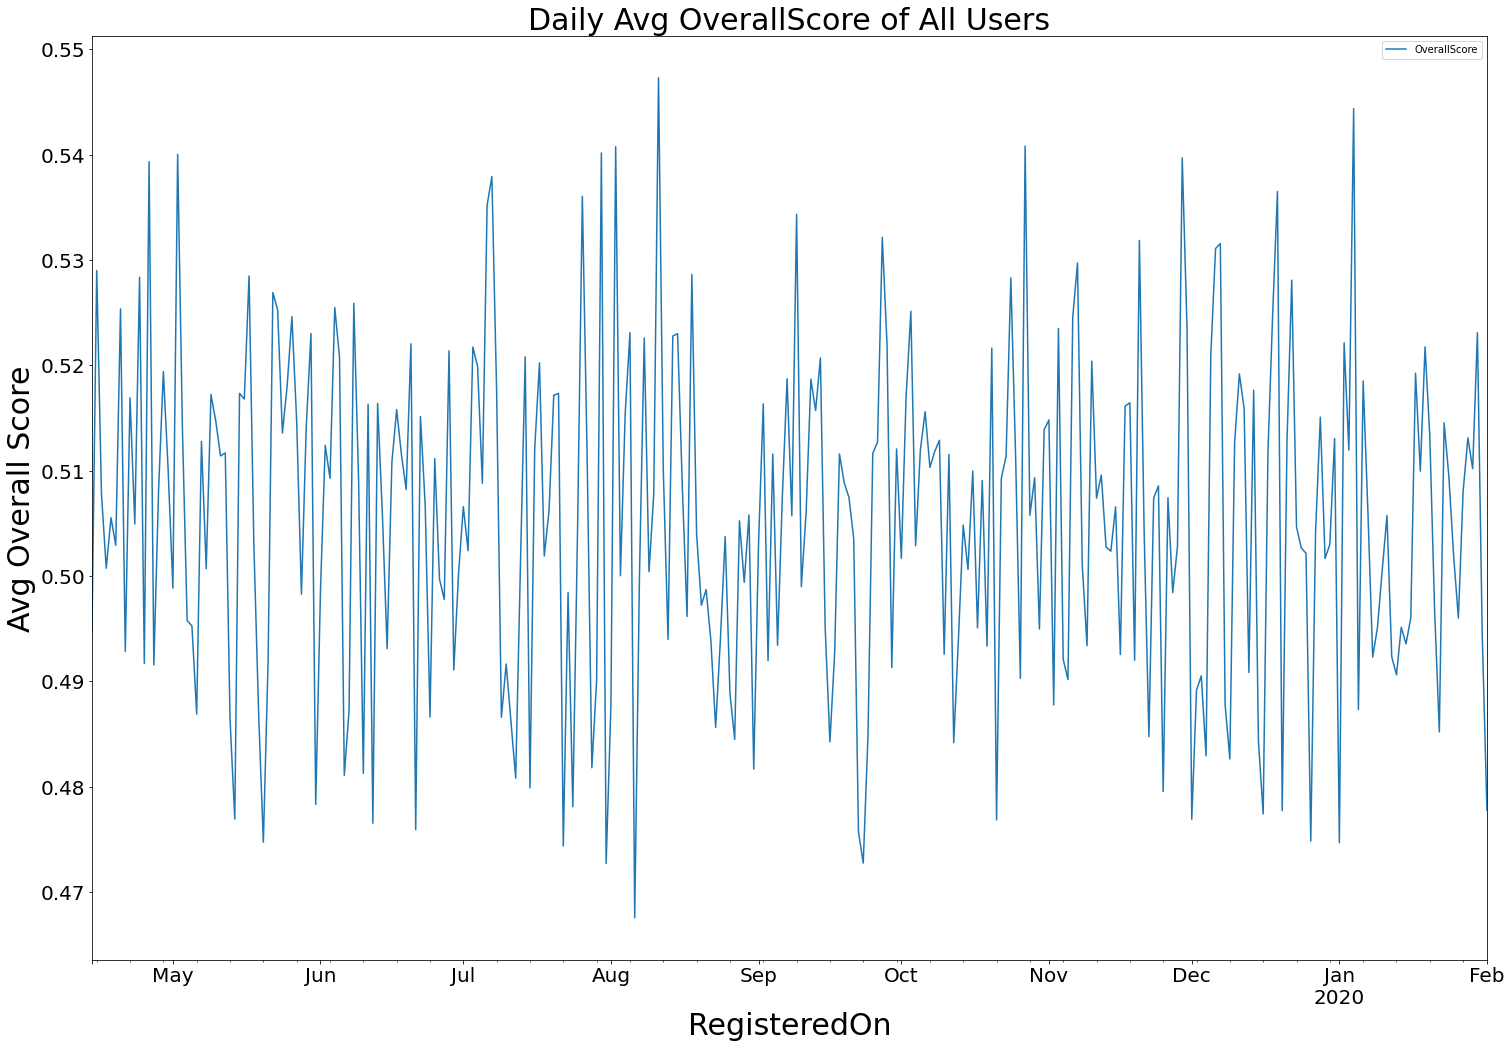

In [70]:
df_s_=df1_sorted_by_date[['RegisteredOn','OverallScore']]
df_s_.index = df_s_['RegisteredOn']
del df_s_['RegisteredOn']
df_s_.groupby(level=0).mean().plot(figsize=(25,17))
plt.ylabel('Avg Overall Score', fontsize=30)
plt.xlabel('RegisteredOn', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Daily Avg OverallScore of All Users', fontsize=30)
plt.show()